# Beer Boroughs
-----------

## Finding your suds in a sea of cities



![alt text](https://upload.wikimedia.org/wikipedia/commons/f/f4/Beer_banner.jpg "Beer Taps")


### The goal of this project is find the West Coast city with the highest number of Breweries per Capita.  

__Target Audience:__ Anyone searching for a good place to visit or relocate to, who appreciates the value of quality beer

__Data Sources:__ This project will combine data from the following sources:

* US City population and lat/lon.  Datasource: https://simplemaps.com/data/us-cities
* Foursquare venue information.  Datasource: https://developer.foursquare.com/docs/api/venues/search
* Possibly some mapping data to visualize

---


### Examining the Data sources
To examine and understand the data, we can look first at the US City data.  This is downloadable in .csv format from https://simplemaps.com/data/us-cities and contains 16 columns. 

Some of the columns do not contain Population numbers.  I plan to remove those, and set a population threshold (such as cities with more than 50,000 inhabitants)  I'll be able to use the lat/lng as inputs to the foursquare API.  In addition, the timezone column will help me limit this to West Coast USA cities.

Below is a quick visual of the city data. (in case markdown URL doesn't work, i'm including an image)

### City Data
![City Data](https://github.com/danhislop/Coursera_Capstone/blob/master/CityData.png)

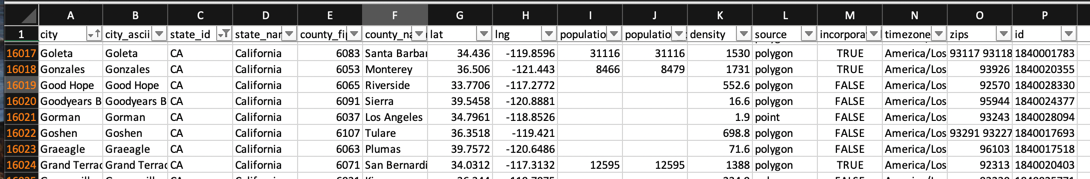

In [28]:
# @hidden_cell
from IPython.display import Image
PATH = "./"
Image(filename = PATH + "CityData.png", width=1000, height=500)

### Foursquare Data
Next, we'll be combining with foursquare data.  Foursquare offers a developer API and we'll be using its venue search functionality.  Breweries have their own category id (categoryId = '50327c8591d4c4b30a586d5d') which, in my own quick testing, seems to be more complete than using (search_query = 'Brewery').  

I did a quick test for Breweries in the city of Goleta, CA and find it to be fairly accurate:

In [27]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
from pandas.io.json import json_normalize # turns json into dataframes

# Setup foursquare credentials 
CLIENT_ID = 'NN45UJFVE5IZ4R53ASPZXNPW1CMDQKU2SJGTOSC2IHJXXMO3' # your Foursquare ID
CLIENT_SECRET = 'IUG1IQ4OXOHZGGEGZHYRE4TTUM4MAPSTDLMNICP5MMGJNW0B' # your Foursquare Secret
VERSION = '20180604'
RADIUS = 4500
LIMIT = 200
city = 'Goleta, CA'
categoryId = '50327c8591d4c4b30a586d5d'

# lookup by city name
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, city, VERSION, RADIUS, LIMIT, categoryId)

# make the get call to foursquare
results = requests.get(url).json()

# assign relevant part of JSON to venues list
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print('\n\n',dataframe.loc[:,'name'])




 0      Santa Barbara Cider Company
1        M.Special Brewing Company
2        Hollister Brewing Company
3    Captain Fatty's Craft Brewery
4                   Rincon Brewery
5             Draughtsmen Aleworks
Name: name, dtype: object


## Summary: 

### With these two datasources, we are ready to dive into the project